In [28]:
import numpy as np
import pandas as pd
import json

In [30]:
with open("datasets/bitly_usagov/example.txt", "r") as f:
    records = [json.loads(line) for line in f if line.find("heartbeat") == -1]
records[0:10]

[{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  'c': 'US',
  'nk': 1,
  'tz': 'America/New_York',
  'gr': 'MA',
  'g': 'A6qOVH',
  'h': 'wfLQtf',
  'l': 'orofrog',
  'al': 'en-US,en;q=0.8',
  'hh': '1.usa.gov',
  'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
  't': 1331923247,
  'hc': 1331822918,
  'cy': 'Danvers',
  'll': [42.576698, -70.954903]},
 {'a': 'GoogleMaps/RochesterNY',
  'c': 'US',
  'nk': 0,
  'tz': 'America/Denver',
  'gr': 'UT',
  'g': 'mwszkS',
  'h': 'mwszkS',
  'l': 'bitly',
  'hh': 'j.mp',
  'r': 'http://www.AwareMap.com/',
  'u': 'http://www.monroecounty.gov/etc/911/rss.php',
  't': 1331923249,
  'hc': 1308262393,
  'cy': 'Provo',
  'll': [40.218102, -111.613297]},
 {'a': 'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0

# timezone counts using pure python

In [31]:
from collections import defaultdict
tz_counts = defaultdict(int)
for r in records:
    if "tz" in r:
        if r["tz"] == "":
            r["tz"] = "Unknown"
        tz_counts[r["tz"]] += 1
    else:
        tz_counts["Missing"] += 1

sorted_tz_counts = sorted(tz_counts.items(), key=lambda x: x[1], reverse=True)
sorted_tz_counts[:10]
timezones, counts = map(list, zip(*sorted_tz_counts))

<AxesSubplot:>

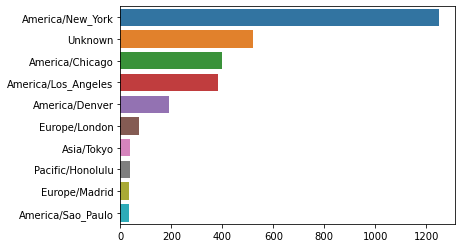

In [32]:
import seaborn as sns
sns.barplot(y=timezones[:10], x=counts[:10])

# using pandas

In [66]:
df = pd.DataFrame(records)
df.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1331923247,1331822918,Danvers,"[42.576698, -70.954903]",NaN
1,GoogleMaps/RochesterNY,US,0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1331923249,1308262393,Provo,"[40.218102, -111.613297]",NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1331923250,1331919941,Washington,"[38.9007, -77.043098]",NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1331923249,1331923068,Braz,"[-23.549999, -46.616699]",NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1331923251,1273672411,Shrewsbury,"[42.286499, -71.714699]",NaN


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3440 entries, 0 to 3439
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   a       3440 non-null   object
 1   c       2919 non-null   object
 2   nk      3440 non-null   int64 
 3   tz      3440 non-null   object
 4   gr      2919 non-null   object
 5   g       3440 non-null   object
 6   h       3440 non-null   object
 7   l       3440 non-null   object
 8   al      3094 non-null   object
 9   hh      3440 non-null   object
 10  r       3440 non-null   object
 11  u       3440 non-null   object
 12  t       3440 non-null   int64 
 13  hc      3440 non-null   int64 
 14  cy      2919 non-null   object
 15  ll      2919 non-null   object
 16  kw      93 non-null     object
dtypes: int64(3), object(14)
memory usage: 457.0+ KB


In [68]:
timezone_counts = df.groupby("tz").size().sort_values(ascending=False)


<AxesSubplot:ylabel='tz'>

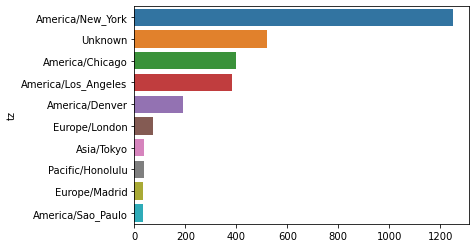

In [69]:
sns.barplot(y=timezone_counts.index[:10], x=timezone_counts.values[:10])

In [70]:
df.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1331923247,1331822918,Danvers,"[42.576698, -70.954903]",NaN
1,GoogleMaps/RochesterNY,US,0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1331923249,1308262393,Provo,"[40.218102, -111.613297]",NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1331923250,1331919941,Washington,"[38.9007, -77.043098]",NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1331923249,1331923068,Braz,"[-23.549999, -46.616699]",NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1331923251,1273672411,Shrewsbury,"[42.286499, -71.714699]",NaN


In [71]:
#df["browser"], df["agent"] = df["a"].str.split(" ", n=1, expand=True)
df_ba = df["a"].str.split(" ", n=1, expand=True)
df_ba.columns = ["browser", "agent"]

In [72]:
df_merge = df.join(df_ba)
df_merge.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,kw,browser,agent
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1331923247,1331822918,Danvers,"[42.576698, -70.954903]",NaN,Mozilla/5.0,(Windows NT 6.1; WOW64) AppleWebKit/535.11 (KH...
1,GoogleMaps/RochesterNY,US,0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1331923249,1308262393,Provo,"[40.218102, -111.613297]",NaN,GoogleMaps/RochesterNY,None
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1331923250,1331919941,Washington,"[38.9007, -77.043098]",NaN,Mozilla/4.0,(compatible; MSIE 8.0; Windows NT 6.1; WOW64; ...
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1331923249,1331923068,Braz,"[-23.549999, -46.616699]",NaN,Mozilla/5.0,(Macintosh; Intel Mac OS X 10_6_8) AppleWebKit...
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1331923251,1273672411,Shrewsbury,"[42.286499, -71.714699]",NaN,Mozilla/5.0,(Windows NT 6.1; WOW64) AppleWebKit/535.11 (KH...


In [73]:
df_merge = df_merge.dropna(subset="agent")

In [75]:
# df_merge["agent"] = ["NW" if a.find("Windows") == -1 else "W" for a in df_merge["agent"] ] #use np.where
df_merge["agent"] = np.where(df_merge["a"].str.contains("Windows"), "W", "NW")
df_merge.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,kw,browser,agent
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1331923247,1331822918,Danvers,"[42.576698, -70.954903]",NaN,Mozilla/5.0,W
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1331923250,1331919941,Washington,"[38.9007, -77.043098]",NaN,Mozilla/4.0,W
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1331923249,1331923068,Braz,"[-23.549999, -46.616699]",NaN,Mozilla/5.0,NW
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1331923251,1273672411,Shrewsbury,"[42.286499, -71.714699]",NaN,Mozilla/5.0,W
5,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0,America/New_York,MA,axNK8c,axNK8c,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1331923252,1273672506,Shrewsbury,"[42.286499, -71.714699]",NaN,Mozilla/5.0,W


In [78]:
grouped = df_merge.groupby(["tz", "agent"])

grp_counts = grouped.size().unstack().fillna(0)
grp_counts

agent,NW,W
tz,,
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
...,...,...
Europe/Warsaw,1.0,15.0
Europe/Zurich,4.0,0.0
Pacific/Auckland,3.0,8.0


In [81]:
idx_sort = grp_counts.sum("columns").argsort()

In [82]:
top10 = grp_counts.take(idx_sort[-10:])
top10

agent,NW,W
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
America/Denver,11.0,59.0
Europe/London,43.0,31.0
America/Los_Angeles,112.0,252.0
America/Chicago,113.0,285.0
Unknown,241.0,276.0


In [84]:
grp_counts.sum("columns").nlargest(10)

tz
America/New_York       1232.0
Unknown                 517.0
America/Chicago         398.0
America/Los_Angeles     364.0
Europe/London            74.0
America/Denver           70.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [87]:
top10 = top10.stack()
top10.name = "total"
top10 = top10.reset_index()
top10


,tz,agent,total
0,America/Sao_Paulo,NW,13.0
1,America/Sao_Paulo,W,20.0
2,Europe/Madrid,NW,16.0
3,Europe/Madrid,W,19.0
4,Pacific/Honolulu,NW,0.0
5,Pacific/Honolulu,W,36.0
6,Asia/Tokyo,NW,2.0
7,Asia/Tokyo,W,35.0
8,America/Denver,NW,11.0
9,America/Denver,W,59.0


<AxesSubplot:xlabel='total', ylabel='tz'>

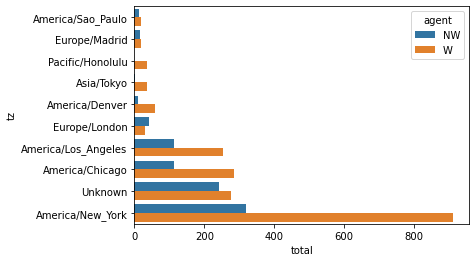

In [90]:
sns.barplot(x="total", y="tz", hue="agent", data=top10)

# normalize counts to see counts easier to see

In [94]:
def normalize_counts(group):
    group["normed_total"] = group["total"] / group["total"].sum()
    return group

In [100]:
top10_normalized = top10.groupby("tz").apply(normalize_counts)

<AxesSubplot:xlabel='normed_total', ylabel='tz'>

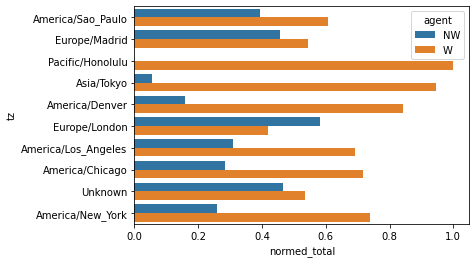

In [101]:
sns.barplot(x="normed_total", y="tz", hue="agent", data=top10_normalized)

# vectorized way of computing normalized values using `transform`

In [118]:
top10_normalized["normv2_total"] = top10["total"] / top10.groupby("tz")["total"].transform("sum")

In [119]:
top10_normalized

,tz,agent,total,normed_total,normv2_total
0,America/Sao_Paulo,NW,13.0,0.393939,0.393939
1,America/Sao_Paulo,W,20.0,0.606061,0.606061
2,Europe/Madrid,NW,16.0,0.457143,0.457143
3,Europe/Madrid,W,19.0,0.542857,0.542857
4,Pacific/Honolulu,NW,0.0,0.000000,0.000000
5,Pacific/Honolulu,W,36.0,1.000000,1.000000
6,Asia/Tokyo,NW,2.0,0.054054,0.054054
7,Asia/Tokyo,W,35.0,0.945946,0.945946
8,America/Denver,NW,11.0,0.157143,0.157143
9,America/Denver,W,59.0,0.842857,0.842857


In [117]:
top

NameError: name 'normalized_top10' is not defined